
##**Proyek Akhir KASDD**

<h2 align="center"><strong>Kafka</strong></h2>

<h3 align="center"><strong>Dataset: Cycling Segments Leaderboard (CSL)</strong></h3>

<p align="center">
Vina Myrnauli Abigail Siallagan<br>
2206825776
</p>

# Deskripsi Dataset dan Preprocessing

Dataset mencakup berbagai informasi, seperti:<br>
* **user_age_group:** Grup usia peserta
* **user_weight_category:** Grup berat badan peserta
* **user_id:** User ID
* **attempt_date:** Tanggal log bersepeda
* **gender:** Jenis kelamin peserta
* **smt_rank:** Rank peserta di suatu segmen dan gender
* **smt_avg_spd:** Kecepatan rata-rata peserta di suatu segmen (lintasan) dalam km/jam
* **smt_finish_seconds:** Waktu yang dibutuhkan peserta untuk menyelesaikan suatu segmen (lintasan) dalam detik
* **smt_name:** Nama segmen (lintasan)
* **act_title:** Judul log aktivitas bersepeda
* **act_avg_spd:** Kecepatan rata-rata peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_max_spd:** Kecepatan maksimum peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_total_km:** Total jarak yang ditempuh peserta di suatu log (sepanjang segmen + di luar segmen) dalam km
* **act_moving_seconds:** Total waktu bersepeda peserta di suatu log (sepanjang segmen + di luar segmen) dalam detik
* **act_total_seconds:** Total waktu suatu log (sepanjang segmen + di luar segmen) dalam detik
* **has_hr_data:** Ada atau tidaknya data detak jantung di log tersebut

In [52]:
!pip install pandas

In [53]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns #untuk visualisasi
import plotly.express as px #untuk visualisasi
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

from numpy import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [54]:
import warnings
warnings.filterwarnings('ignore')

## Membuat dan Membaca Informasi *Dataframe*

In [55]:
df = pd.read_csv("https://drive.google.com/uc?id=1FUIyjpZSSDVb9QAvHR5Am4v3BxTYQu4x")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_age_group        6292 non-null   object 
 1   user_id               6292 non-null   int64  
 2   attempt_date          6292 non-null   object 
 3   gender                6292 non-null   object 
 4   smt_rank              6292 non-null   int64  
 5   smt_avg_spd           6292 non-null   float64
 6   smt_finish_seconds    6292 non-null   int64  
 7   smt_name              6292 non-null   object 
 8   user_weight_category  5932 non-null   object 
 9   act_title             6292 non-null   object 
 10  act_avg_spd           6292 non-null   float64
 11  act_max_spd           6292 non-null   float64
 12  act_total_km          6292 non-null   float64
 13  act_moving_seconds    6292 non-null   int64  
 14  act_total_seconds     6292 non-null   int64  
 15  has_hr_data          

In [57]:
df.head()

,user_age_group,user_id,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,id
0,25 to 34,1972,2017-12-22,male,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0,6977
1,25 to 34,239,2015-04-13,male,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0,3518
2,25 to 34,405,2018-02-07,male,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0,415
3,25 to 34,318,2018-08-24,male,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1,1755
4,25 to 34,628,2020-03-06,female,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0,7088


In [58]:
df.describe()

,user_id,smt_rank,smt_avg_spd,smt_finish_seconds,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,id
count,6292.000000,6292.000000,6292.00000,6292.000000,6292.000000,6292.000000,6292.000000,6.292000e+03,6.292000e+03,6292.000000,6292.000000
mean,782.421964,172.515893,26.80925,531.276224,22.681024,44.757533,42.147134,1.252379e+04,1.252379e+04,0.196440,3947.028608
std,539.051866,173.487689,8.44806,431.974886,5.851547,17.055338,27.010789,2.157781e+05,2.157781e+05,0.397337,2261.820409
min,2.000000,1.000000,0.80000,112.000000,0.000000,8.600000,2.280000,2.640000e+02,2.640000e+02,0.000000,1.000000
25%,335.000000,37.000000,21.30000,266.000000,18.700000,36.700000,23.440000,4.095000e+03,4.095000e+03,0.000000,2004.750000
50%,703.500000,108.000000,26.50000,439.000000,22.100000,42.100000,37.780000,5.781500e+03,5.781500e+03,0.000000,3941.000000
75%,1096.000000,267.000000,32.50000,651.000000,26.400000,48.600000,52.140000,8.098500e+03,8.098500e+03,0.000000,5907.250000
max,2254.000000,805.000000,87.30000,9224.000000,75.200000,690.800000,706.590000,1.167978e+07,1.167978e+07,1.000000,7863.000000


## Handle *Missing Values*

In [59]:
df.isnull().sum()

,0
user_age_group,0
user_id,0
attempt_date,0
gender,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
smt_name,0
user_weight_category,360
act_title,0


In [60]:
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                      Total   Percent
user_weight_category    360  0.057216


In [61]:
df[df.isna().any(axis=1)]

,user_age_group,user_id,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,id
18,25 to 34,222,2019-10-23,male,76,33.2,512,King Street side,NaN,Evening Ride,27.6,45.7,40.23,5253,5253,0,2057
54,25 to 34,320,2018-01-13,male,286,24.1,250,Headquarters Business Park,NaN,Evening Ride,20.7,34.6,14.11,2451,2451,0,6552
69,35 to 44,824,2019-09-16,male,254,28.2,254,Oghor 2 SailsIsland,NaN,Evening Ride,23.2,36.4,50.50,7821,7821,0,4224
71,25 to 34,1925,2019-12-09,male,624,18.2,332,Headquarters Business Park,NaN,Afternoon Ride,17.3,43.6,17.44,3640,3640,0,6888
80,25 to 34,222,2019-12-16,male,82,23.4,1361,S.Ubhur Alkurnaysh South Bound with detour,NaN,الجوهرة,27.5,46.4,53.37,6987,6987,0,1226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,25 to 34,369,2016-11-23,male,227,24.9,565,Starbucks to Majid,NaN,Pedalada de mañana,29.6,44.6,36.17,4402,4402,0,379
6200,55 to 64,1275,2020-02-28,male,16,14.2,689,PRINCE SULTAN - ASSALAM TO FATIMA,NaN,Camel Circle Ride V2,18.9,52.2,75.25,14305,14305,0,3073
6232,25 to 34,1486,2018-03-14,male,562,19.4,369,Oghor 2 SailsIsland,NaN,Night Ride,17.9,37.4,10.94,2206,2206,0,3890
6265,25 to 34,1954,2019-07-12,male,685,16.8,359,Headquarters Business Park,NaN,Morning Ride,15.7,31.0,12.87,2961,2961,0,6949


In [62]:
df_clean = df.copy()

In [63]:
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [64]:
df_clean['user_weight_category'] = fill_null_mode(df_clean['user_weight_category'])

In [65]:
df_clean.isnull().sum()

,0
user_age_group,0
user_id,0
attempt_date,0
gender,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
smt_name,0
user_weight_category,0
act_title,0


## Handle duplicate data

In [66]:
duplicate_rows = df_clean[df_clean.duplicated()]
duplicate_total_rows, duplicate_total_attributes = duplicate_rows.shape
print('jumlah data duplicate: ', duplicate_total_rows)

jumlah data duplicate:  0


In [67]:
df_clean.drop(["id", "user_id"], axis = 1, inplace=True)

## Handle Outlier

In [68]:
def hitung_outlier(df) :
    outliers_dict = {}
    outliers_percentage_dict = {}

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics) :
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outliers = df[col][
            (df[col] > q3 + 1.5 * iqr) |
            (df[col] < q1 - 1.5 * iqr)
        ]
        outliers_dict[col] = len(outliers)
        outliers_percentage_dict[col] = (len(outliers) / len(df)) * 100

    outliers_values = tuple(outliers_dict.values())
    outliers_percentage_values = tuple(outliers_percentage_dict.values())

    outliers_df = pd.DataFrame([outliers_values, outliers_percentage_values],
                            columns=list(outliers_dict.keys()),
                            index=['Outliers count', 'Outliers percentage (%)'])
    display(outliers_df)

In [69]:
hitung_outlier(df_clean)

,smt_rank,smt_avg_spd,smt_finish_seconds,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
Outliers count,163.000000,53.000000,288.000000,94.000000,375.000000,308.000000,296.000000,296.000000,1236.000000
Outliers percentage (%),2.590591,0.842339,4.577241,1.493961,5.959949,4.895105,4.704387,4.704387,19.643992


<Axes: >

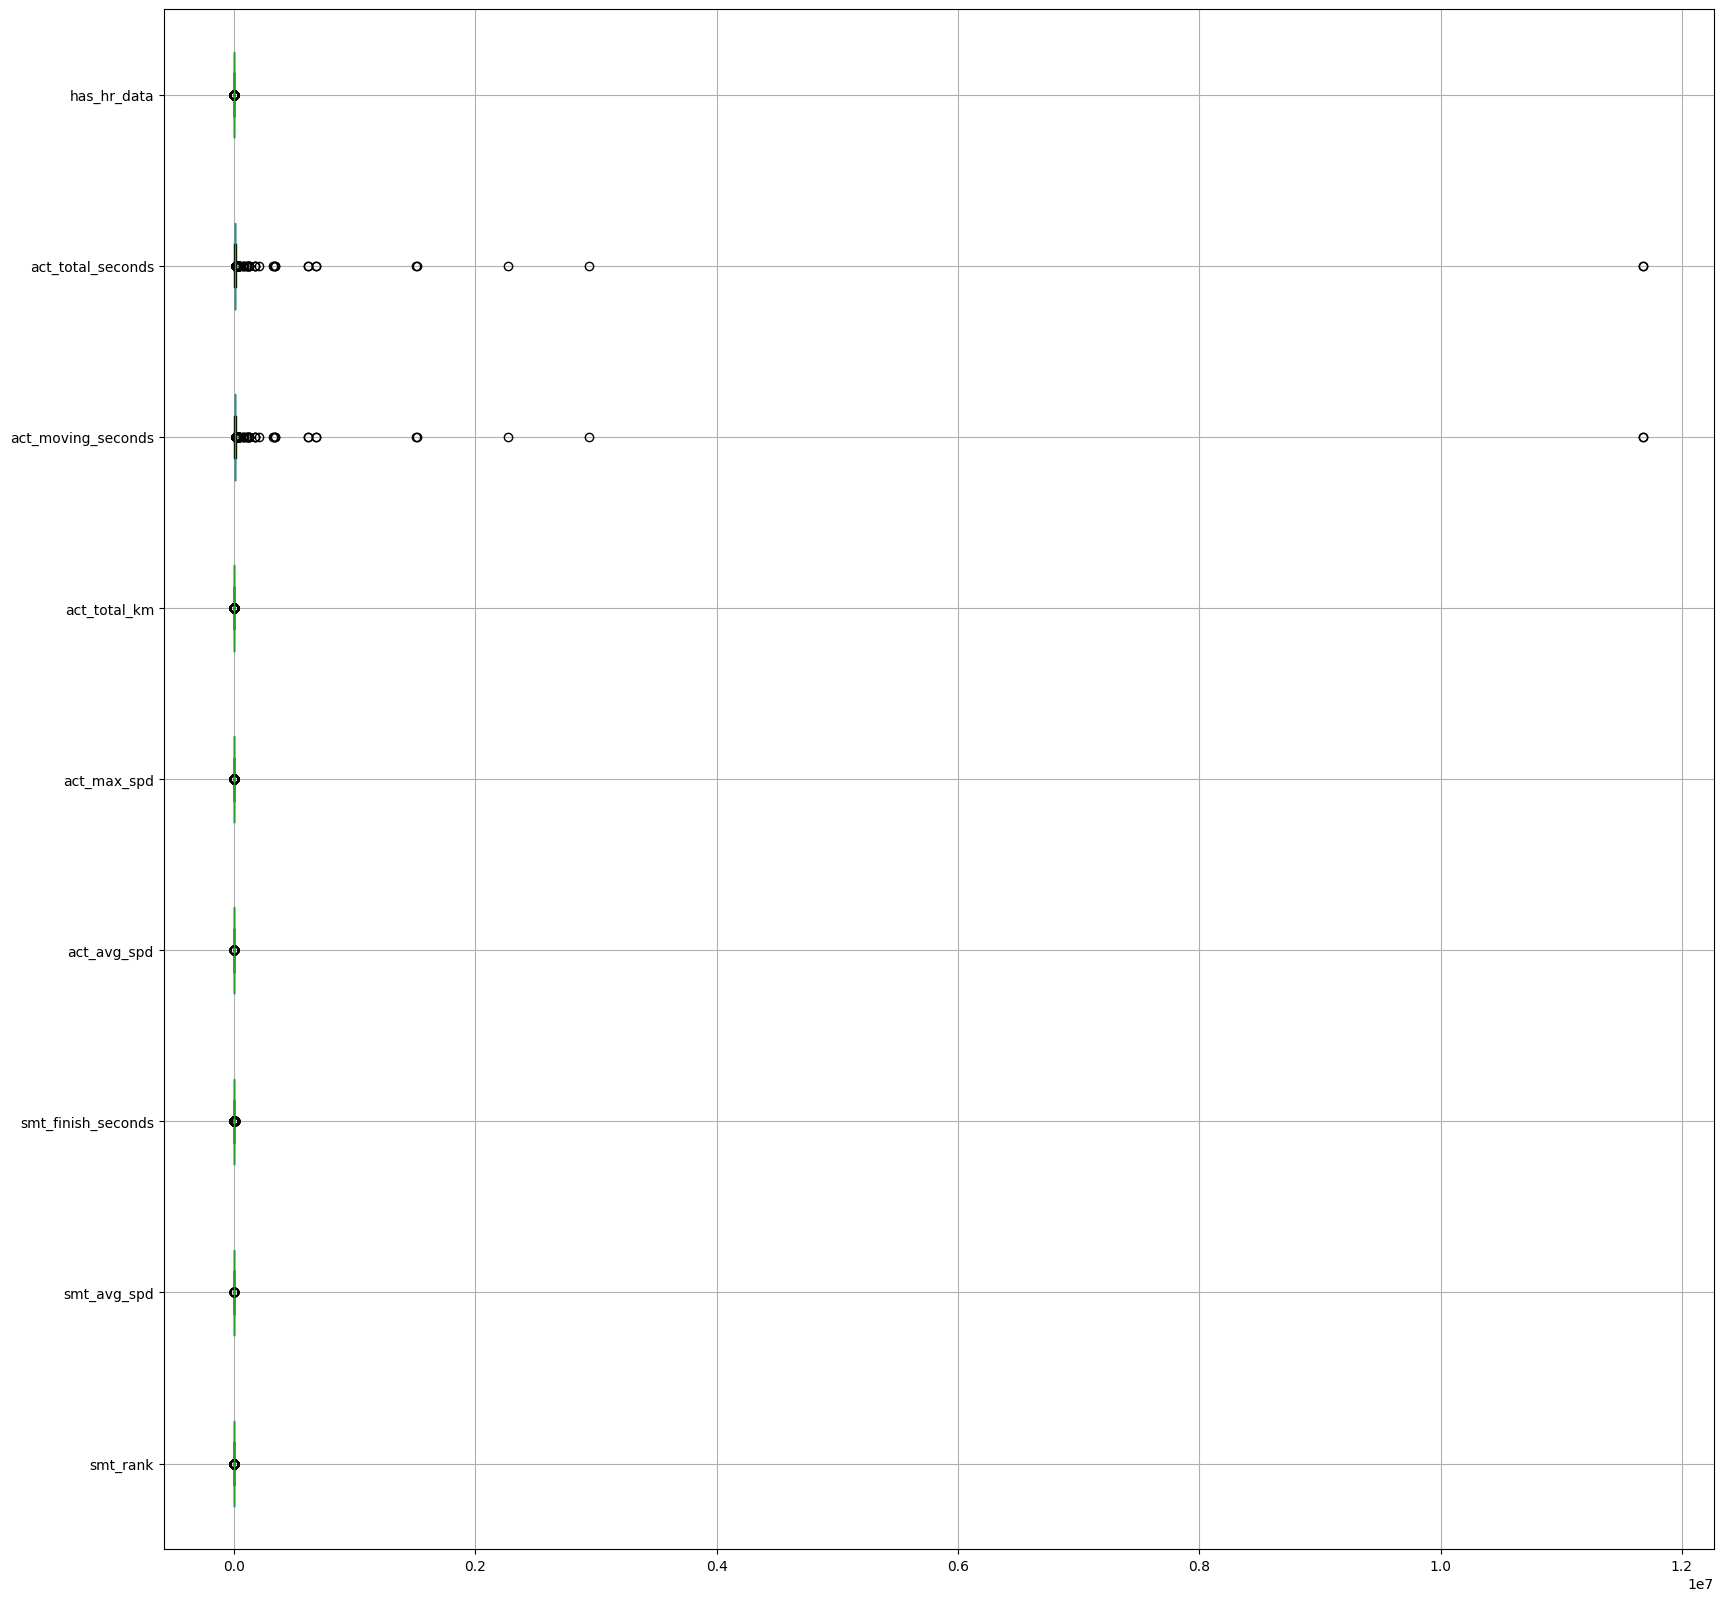

In [70]:
df_clean.boxplot(vert=False, figsize=(20,20))

# Modelling

## Klasifikasi

### XGBoost Classifier with Hypertuning

#### Load Data

In [71]:
df_xg = df_clean.copy()
df_xg.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,25 to 34,2017-12-22,male,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0
1,25 to 34,2015-04-13,male,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0
2,25 to 34,2018-02-07,male,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,25 to 34,2018-08-24,male,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,25 to 34,2020-03-06,female,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0


#### Encode Data

Mencari fitur kategorikal per-kolom untuk di encode.

In [72]:
# Mencari Tiap Nilai Unik Per Kolom
for column in df_xg.select_dtypes(include=['object', 'category']).columns:
    unique_vals = df_xg[column].unique()
    print(f"Unique values in '{column}': {unique_vals}\n")

Unique values in 'user_age_group': ['25 to 34' '19 and under' '35 to 44' '55 to 64' '45 to 54' '20 to 24'
 '65 to 69' '75+' '70 to 74']

Unique values in 'attempt_date': ['2017-12-22' '2015-04-13' '2018-02-07' ... '2016-04-21' '2019-08-31'
 '2019-04-25']

Unique values in 'gender': ['male' 'female']

Unique values in 'smt_name': ['Headquarters Business Park' 'Oghor 2 SailsIsland' 'Starbucks to Majid'
 'Al Fardoos to shellfish round about' 'North Corniche' 'King Street side'
 'S.Ubhur Alkurnaysh South Bound with detour' 'Obhur North Short'
 'PRINCE SULTAN - ASSALAM TO FATIMA']

Unique values in 'user_weight_category': ['54 kg and under' '105 kg to 114 kg' '75 to 84 kg' '65 to 74 kg'
 '115 kg and over' '85 to 95 kg' '95 kg to 104 kg' '55 to 64 kg']

Unique values in 'act_title': ['Night Ride' 'Evening Ride' 'Afternoon Ride' ...
 'Evening Ride مسائي للوحوش' 'Evening Ride With Jeddah Cyclists '
 'Nice Relaxed Ride next the Red Sea']



In [73]:
# Mapping

# XGBoost hanya mengharapkan label target 0 dan 1 untuk klasifikasi biner
gender_mapper = {'female': 1, 'male': 0 }
df_xg['gender'] = df_xg['gender'].map(gender_mapper)

seg_mapper = {
    'Starbucks to Majid': 0,
    'King Street side': 1,
    'Al Fardoos to shellfish round about': 2,
    'Headquarters Business Park': 3,
    'PRINCE SULTAN - ASSALAM TO FATIMA': 4,
    'Oghor 2 SailsIsland': 5,
    'Obhur North Short': 6,
    'North Corniche': 7,
    'S.Ubhur Alkurnaysh South Bound with detour': 8
}
df_xg['smt_name'] = df_xg['smt_name'].map(seg_mapper)


# Frequency Encoding
frequency_encoding_act = df_xg['act_title'].value_counts(normalize=True)
df_xg['act_title'] = df_xg['act_title'].map(frequency_encoding_act)

# Time-Based Encoding
df_xg['attempt_date'] = pd.to_datetime(df_xg['attempt_date'])
df_xg['attempt_year'] = df_xg['attempt_date'].dt.year
df_xg['attempt_month'] = df_xg['attempt_date'].dt.month
df_xg['attempt_day'] = df_xg['attempt_date'].dt.day
df_xg = df_xg.drop('attempt_date', axis=1)

# Ordinal Encoding
weight_mapper = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
df_xg['user_weight_category'] = df_xg['user_weight_category'].map(weight_mapper)

age_mapper = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
df_xg['user_age_group'] = df_xg['user_age_group'].map(age_mapper)

# Menampilan Data
df_xg.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,attempt_year,attempt_month,attempt_day
0,2,0,712,15.8,382,3,0,0.132072,13.6,34.9,19.24,5103,5103,0,2017,12,22
1,2,0,189,33.2,216,5,6,0.132072,21.5,43.2,23.47,3926,3926,0,2015,4,13
2,2,0,264,23.7,593,0,3,0.281310,26.7,92.9,38.23,5152,5152,0,2018,2,7
3,2,0,50,33.4,817,2,3,0.092498,31.4,54.4,65.77,7548,7548,1,2018,8,24
4,2,1,19,21.3,284,3,0,0.000477,19.9,43.2,96.53,17493,17493,0,2020,3,6


**Penjelasan:**
- Label encoding: karena cmn ada 2 kategorikal
- Frequency encoding: karena ada banyak kategori yg tidak pakai urutan
- Ordinal encoding: kategorikal tapi berurutan
- Time-based encoding: mengubah informasi waktu (seperti tanggal, bulan, tahun, waktu dalam sehari, dll.) menjadi fitur numerik

Sebenarnya di sini, saya ingin menggunakan One-Hot Encoding untuk `smt_name`. Akan tetapi, encoding ini dapat meningkatkan dimensi data secara signifikan sehingga dapat menyebabkan seperti overfitting atau kompleksitas yang tinggi.

**Sumber:**
- https://letsdatascience.com/frequency-encoding/
- https://medium.com/@WojtekFulmyk/ordinal-encoding-a-brief-explanation-a29cf374dbc1

#### Proses Modelling

In [74]:
# Memisahkan Fitur dan Target
X = df_xg.drop(columns=['gender']).to_numpy()
y = df_xg['gender'].to_numpy()

In [75]:
from sklearn.model_selection import train_test_split
# Split Data Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Cek keseimbangan data train.

In [76]:
# Periksa distribusi kelas
print("Distribusi Kelas dalam Data Train:")
print(pd.Series(y_train).value_counts())


Distribusi Kelas dalam Data Train:
0    4831
1     202
Name: count, dtype: int64


**Penjelasan:**
- Dapat dilihat data tidak seimbang. Maka dari itu, kita dapat menggunakan ADASYN.
- ADASYN (Adaptive Synthetic Sampling) yaitu teknik data balancing dengan oversampling untuk meningkatkan jumlah data pada kelas minoritas dengan menghasilkan sampel sintetik.

**Sumber:**
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

In [77]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier

# Membuat pipeline untuk XGBoost Classifier
pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

**Penjelasan:**
- Saya menggunakan pipeline di sini untuk menggabungkan langkah-langkah preprocessing seperti oversampling dengan ADASYN dan pelatihan model XGBoost Classifier.
- Pipeline ini dapat memastikan kedua komponen yang ada di atas dapat diterapkan secara berurutan dan otomatis sehingga kualitas data juga semakin meningkat.

**Sumber:**
- https://aws.amazon.com/id/what-is/data-pipeline/

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
}



Untuk tiap parameter saya menggunakan nilai yang sering atau biasa digunakan. Berikut adalah penjelasan singkatnya:
- xgb__n_estimators: jumlah pohon keputusan yang digunakan di model.
- xgb__max_depth: kedalaman maksimum setiap pohon yang mengontrol kompleksitas pohon.
- xgb__learning_rate: kecepatan pembelajaran untuk atur berapa besar pembaruan model tiap iterasi.
- xgb__subsample: proporsi data untuk bangun setiap pohon.
- xgb__colsample_bytree: proporsi fitur yang dipilih untuk tiap pohon.

**Sumber:**
- https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier

# GridSearchCV untuk hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)


In [80]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Fit model ke data training yang sudah diresample
grid_search.fit(X_train, y_train)

# Menampilkan hasil hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score on Training Set:", grid_search.best_score_)

# Evaluasi pada data testing
best_model = grid_search.best_estimator_.named_steps['xgb']
y_pred = best_model.predict(X_test)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Menghitung F1 Macro, F1 Micro, Precision, Recall, dan Accuracy
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Menampilkan hasil evaluasi
print("Accuracy on Test Set:", accuracy)
print("F1 Macro Score on Test Set:", f1_macro)
print("F1 Micro Score on Test Set:", f1_micro)
print("Precision Macro Score on Test Set:", precision_macro)
print("Precision Micro Score on Test Set:", precision_micro)
print("Recall Macro Score on Test Set:", recall_macro)
print("Recall Micro Score on Test Set:", recall_micro)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0}
Best F1 Macro Score on Training Set: 0.9799792406508644
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       0.93      0.98      0.95        51

    accuracy                           1.00      1259
   macro avg       0.96      0.99      0.98      1259
weighted avg       1.00      1.00      1.00      1259

Accuracy on Test Set: 0.9960285941223193
F1 Macro Score on Test Set: 0.9751544214867878
F1 Micro Score on Test Set: 0.9960285941223193
Precision Macro Score on Test Set: 0.9625480252036269
Precision Micro Score on Test Set: 0.9960285941223193
Recall Macro Score on Test Set: 0.9885404492922997
Recall Micro Score on Test Set: 0.9960285941223193


#### Predict Data Test

#### Load and Process data

In [81]:
test_data = pd.read_csv("https://drive.google.com/uc?id=1qPBRTfLz4wPgirhCcROaicQk0SDfeH9C")

id_test = test_data['id'].copy()
test_data.drop(["id", "user_id"], axis=1, inplace=True)

In [82]:
# Cek missing values awal
print("Missing values before:")
print(test_data.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_finish_seconds       0
smt_name                 0
user_weight_category    36
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
dtype: int64


In [83]:
isi_modus = test_data['user_weight_category'].mode()[0]
test_data['user_weight_category'] = test_data['user_weight_category'].fillna(isi_modus)

In [84]:
# Mapping
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data['user_age_group'] = test_data['user_age_group'].map(age_mapping)


weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data['user_weight_category'] = test_data['user_weight_category'].map(weight_mapping)

mapping = {
    'Starbucks to Majid': 0,
    'King Street side': 1,
    'Al Fardoos to shellfish round about': 2,
    'Headquarters Business Park': 3,
    'PRINCE SULTAN - ASSALAM TO FATIMA': 4,
    'Oghor 2 SailsIsland': 5,
    'Obhur North Short': 6,
    'North Corniche': 7,
    'S.Ubhur Alkurnaysh South Bound with detour': 8
}

test_data['smt_name'] = test_data['smt_name'].map(mapping)

# Frequency encoding
freq_map = test_data['act_title'].value_counts(normalize=True)
test_data['act_title'] = test_data['act_title'].map(freq_map)

# Encoding attempt_date
test_data['attempt_date'] = pd.to_datetime(test_data['attempt_date'])
test_data['attempt_year'] = test_data['attempt_date'].dt.year
test_data['attempt_month'] = test_data['attempt_date'].dt.month
test_data['attempt_day'] = test_data['attempt_date'].dt.day
test_data = test_data.drop('attempt_date', axis=1)

In [85]:
test_data.isnull().sum()

,0
user_age_group,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
smt_name,0
user_weight_category,0
act_title,0
act_avg_spd,0
act_max_spd,0
act_total_km,0


In [86]:
test_predictions = best_model.predict(test_data)

mapping = {0: 2, 1: 1}  # 0 (male) -> 2, 1 (female) -> 1
test_predictions_mapped = pd.Series(test_predictions).map(mapping)

submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'gender': test_predictions_mapped
})

#Simpan ke CSV

submission.to_csv('submission.csv', index=False)
submission.head()

## Regresi

### KNN Regressor with Hypertuning

In [87]:
df_knn = df_clean.copy()
df_knn.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,25 to 34,2017-12-22,male,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0
1,25 to 34,2015-04-13,male,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0
2,25 to 34,2018-02-07,male,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,25 to 34,2018-08-24,male,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,25 to 34,2020-03-06,female,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0


In [88]:
# Mencari Tiap Nilai Unik Per Kolom
for column in df_knn.select_dtypes(include=['object', 'category']).columns:
    unique_vals = df_knn[column].unique()
    print(f"Unique values in '{column}': {unique_vals}\n")

Unique values in 'user_age_group': ['25 to 34' '19 and under' '35 to 44' '55 to 64' '45 to 54' '20 to 24'
 '65 to 69' '75+' '70 to 74']

Unique values in 'attempt_date': ['2017-12-22' '2015-04-13' '2018-02-07' ... '2016-04-21' '2019-08-31'
 '2019-04-25']

Unique values in 'gender': ['male' 'female']

Unique values in 'smt_name': ['Headquarters Business Park' 'Oghor 2 SailsIsland' 'Starbucks to Majid'
 'Al Fardoos to shellfish round about' 'North Corniche' 'King Street side'
 'S.Ubhur Alkurnaysh South Bound with detour' 'Obhur North Short'
 'PRINCE SULTAN - ASSALAM TO FATIMA']

Unique values in 'user_weight_category': ['54 kg and under' '105 kg to 114 kg' '75 to 84 kg' '65 to 74 kg'
 '115 kg and over' '85 to 95 kg' '95 kg to 104 kg' '55 to 64 kg']

Unique values in 'act_title': ['Night Ride' 'Evening Ride' 'Afternoon Ride' ...
 'Evening Ride مسائي للوحوش' 'Evening Ride With Jeddah Cyclists '
 'Nice Relaxed Ride next the Red Sea']



In [89]:
# Label Encoding
gender_mapper = {'female': 1, 'male': 2 }
df_knn['gender'] =df_knn['gender'].map(gender_mapper)

# Frequency Encoding
frequency_encoding_act = df_knn['act_title'].value_counts(normalize=True)
df_knn['act_title'] = df_knn['act_title'].map(frequency_encoding_act)

# Time-Based Encoding
df_knn['attempt_date'] = pd.to_datetime(df_knn['attempt_date'])
df_knn['attempt_year'] = df_knn['attempt_date'].dt.year
df_knn['attempt_month'] = df_knn['attempt_date'].dt.month
df_knn['attempt_day'] = df_knn['attempt_date'].dt.day
df_knn = df_knn.drop('attempt_date', axis=1)

# Ordinal Encoding
weight_mapper = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
df_knn['user_weight_category'] = df_knn['user_weight_category'].map(weight_mapper)

age_mapper = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
df_knn['user_age_group'] = df_knn['user_age_group'].map(age_mapper)

mapping = {
    'Starbucks to Majid': 0,
    'King Street side': 1,
    'Al Fardoos to shellfish round about': 2,
    'Headquarters Business Park': 3,
    'PRINCE SULTAN - ASSALAM TO FATIMA': 4,
    'Oghor 2 SailsIsland': 5,
    'Obhur North Short': 6,
    'North Corniche': 7,
    'S.Ubhur Alkurnaysh South Bound with detour': 8
}

df_knn['smt_name'] = df_knn['smt_name'].map(mapping)

# Menampilan Data
df_knn.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,attempt_year,attempt_month,attempt_day
0,2,2,712,15.8,382,3,0,0.132072,13.6,34.9,19.24,5103,5103,0,2017,12,22
1,2,2,189,33.2,216,5,6,0.132072,21.5,43.2,23.47,3926,3926,0,2015,4,13
2,2,2,264,23.7,593,0,3,0.281310,26.7,92.9,38.23,5152,5152,0,2018,2,7
3,2,2,50,33.4,817,2,3,0.092498,31.4,54.4,65.77,7548,7548,1,2018,8,24
4,2,1,19,21.3,284,3,0,0.000477,19.9,43.2,96.53,17493,17493,0,2020,3,6


In [90]:
def hitung_outlier(df) :
    outliers_dict = {}
    outliers_percentage_dict = {}

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics) :
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outliers = df[col][
            (df[col] > q3 + 1.5 * iqr) |
            (df[col] < q1 - 1.5 * iqr)
        ]
        outliers_dict[col] = len(outliers)
        outliers_percentage_dict[col] = (len(outliers) / len(df)) * 100

    outliers_values = tuple(outliers_dict.values())
    outliers_percentage_values = tuple(outliers_percentage_dict.values())

    outliers_df = pd.DataFrame([outliers_values, outliers_percentage_values],
                            columns=list(outliers_dict.keys()),
                            index=['Outliers count', 'Outliers percentage (%)'])
    display(outliers_df)

In [91]:
# Periksa outlier
hitung_outlier(df_knn)

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,attempt_year,attempt_month,attempt_day
Outliers count,483.000000,253.000000,163.000000,53.000000,288.000000,0.0,0.0,0.0,94.000000,375.000000,308.000000,296.000000,296.000000,1236.000000,91.000000,0.0,0.0
Outliers percentage (%),7.676414,4.020979,2.590591,0.842339,4.577241,0.0,0.0,0.0,1.493961,5.959949,4.895105,4.704387,4.704387,19.643992,1.446281,0.0,0.0


<Axes: >

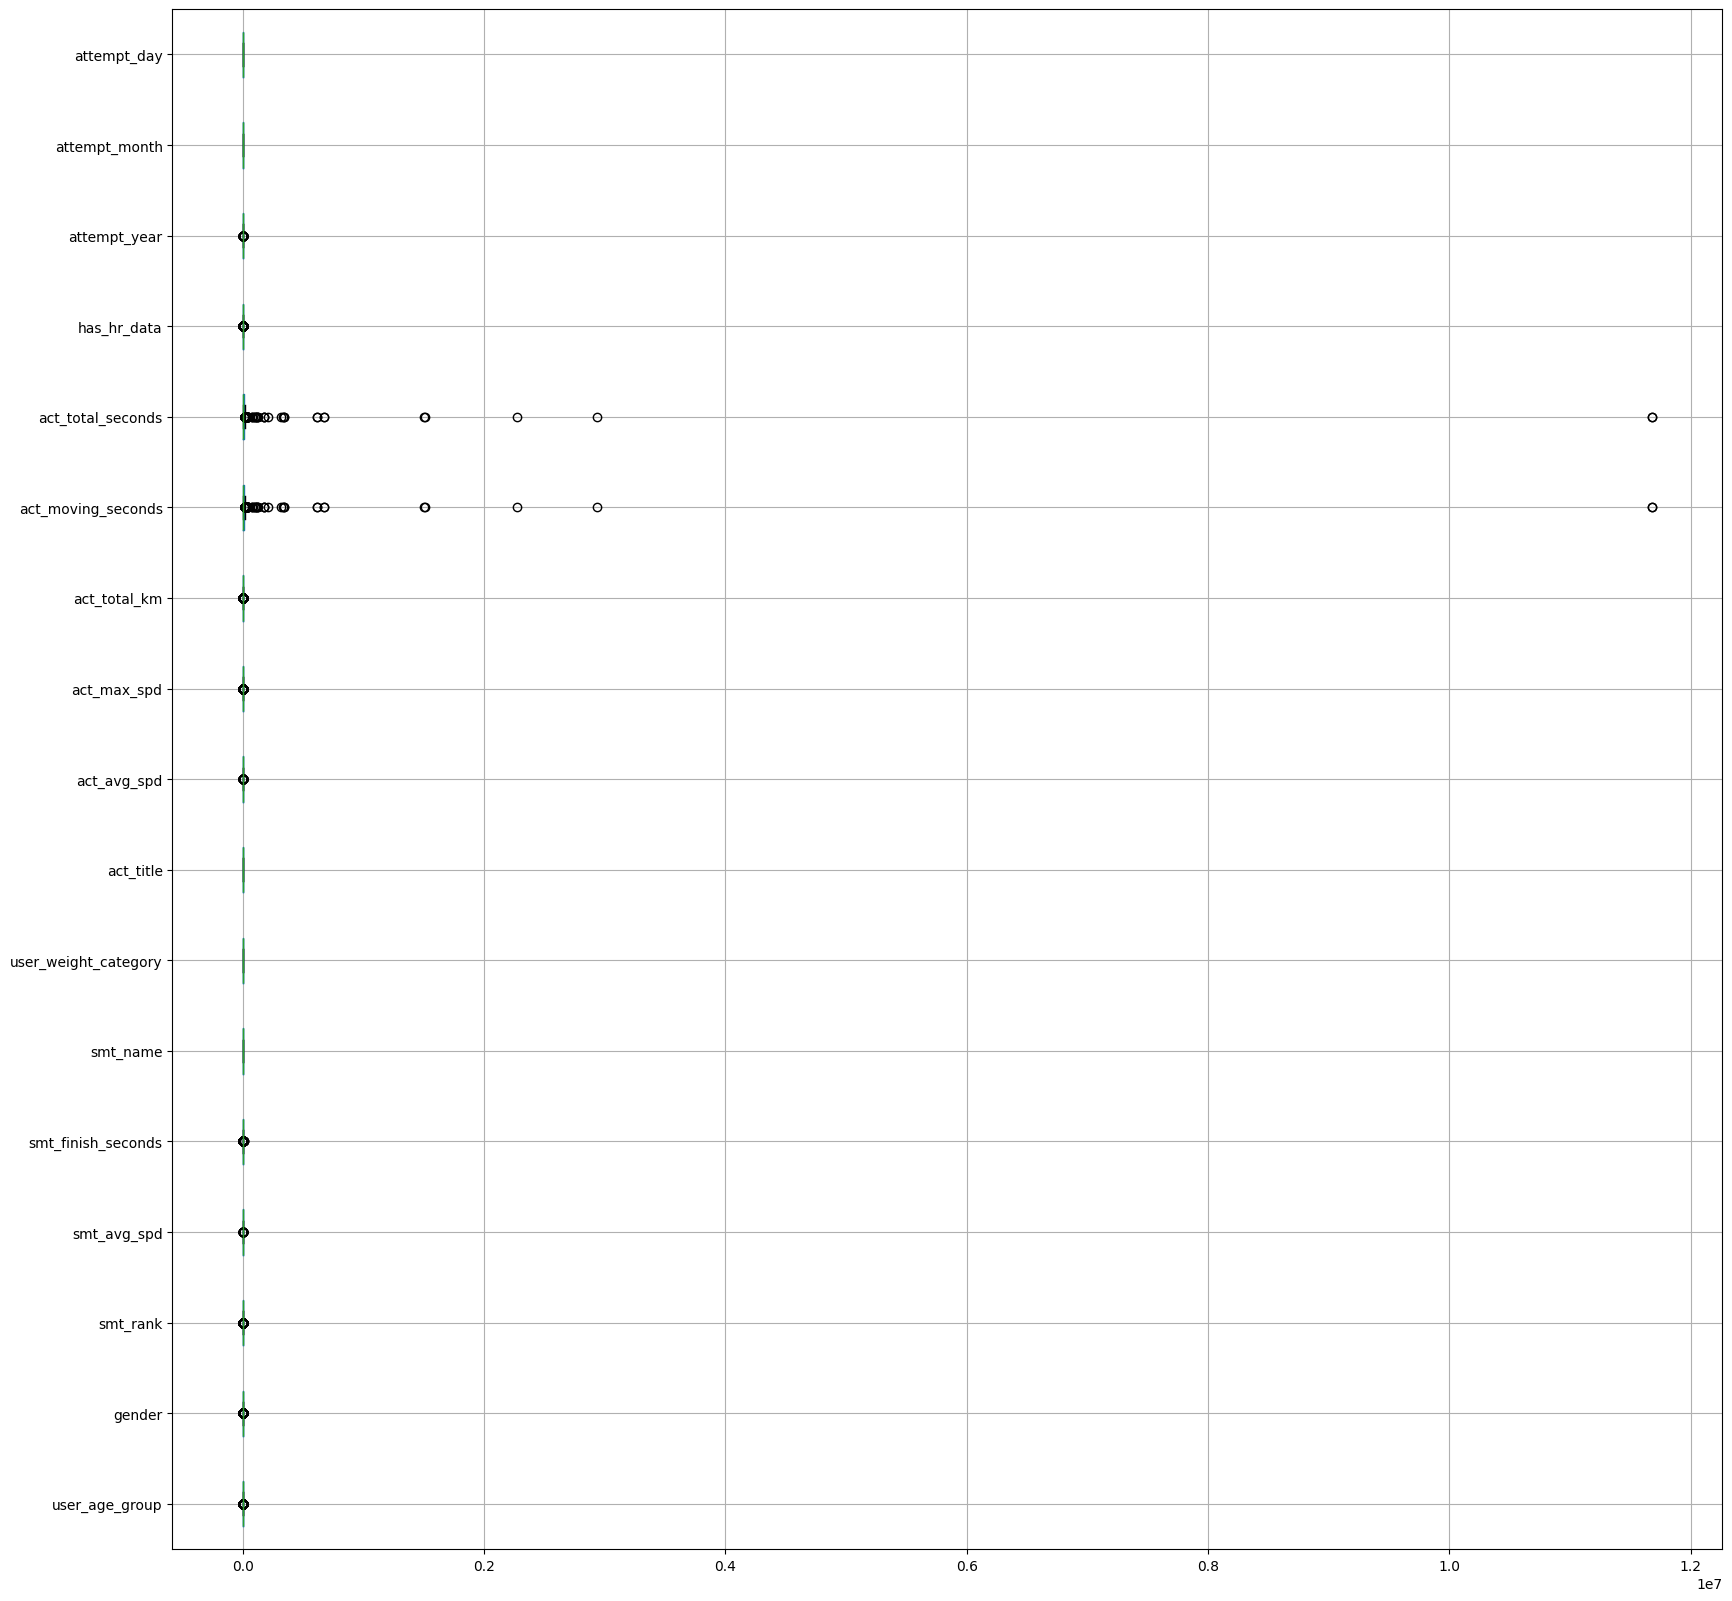

In [92]:
df_knn.boxplot(vert=False, figsize=(20,20))

In [93]:
# Hapus outlier yang tak wajar
def hapus_outliers_tertinggi(df, col, percentage=15):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1

    outliers = df[col] > (q3 + 1.5 * iqr)
    outliers_index = df[outliers].index

    # Ambil 30% nilai tertinggi di antara outliers
    outliers_values = df.loc[outliers_index, col].sort_values(ascending=False)
    n_remove = int(len(outliers_values) * (percentage / 100))
    to_remove = outliers_values.head(n_remove).index

    return df.drop(index=to_remove)

df_knn = hapus_outliers_tertinggi(df_knn, 'act_total_seconds', percentage=15)
df_knn = hapus_outliers_tertinggi(df_knn, 'act_moving_seconds', percentage=15)
df_knn = hapus_outliers_tertinggi(df_knn, 'smt_finish_seconds', percentage=15)
df_knn = hapus_outliers_tertinggi(df_knn, 'act_max_spd', percentage=15)

In [94]:
# Periksa outlier
hitung_outlier(df_knn)

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,attempt_year,attempt_month,attempt_day
Outliers count,461.000000,241.000000,156.000000,43.0000,235.000000,0.0,0.0,0.0,63.000000,300.00000,256.000000,216.000000,216.000000,1229.000000,90.000000,0.0,0.0
Outliers percentage (%),7.531449,3.937265,2.548603,0.7025,3.839242,0.0,0.0,0.0,1.029244,4.90116,4.182323,3.528835,3.528835,20.078419,1.470348,0.0,0.0


<Axes: >

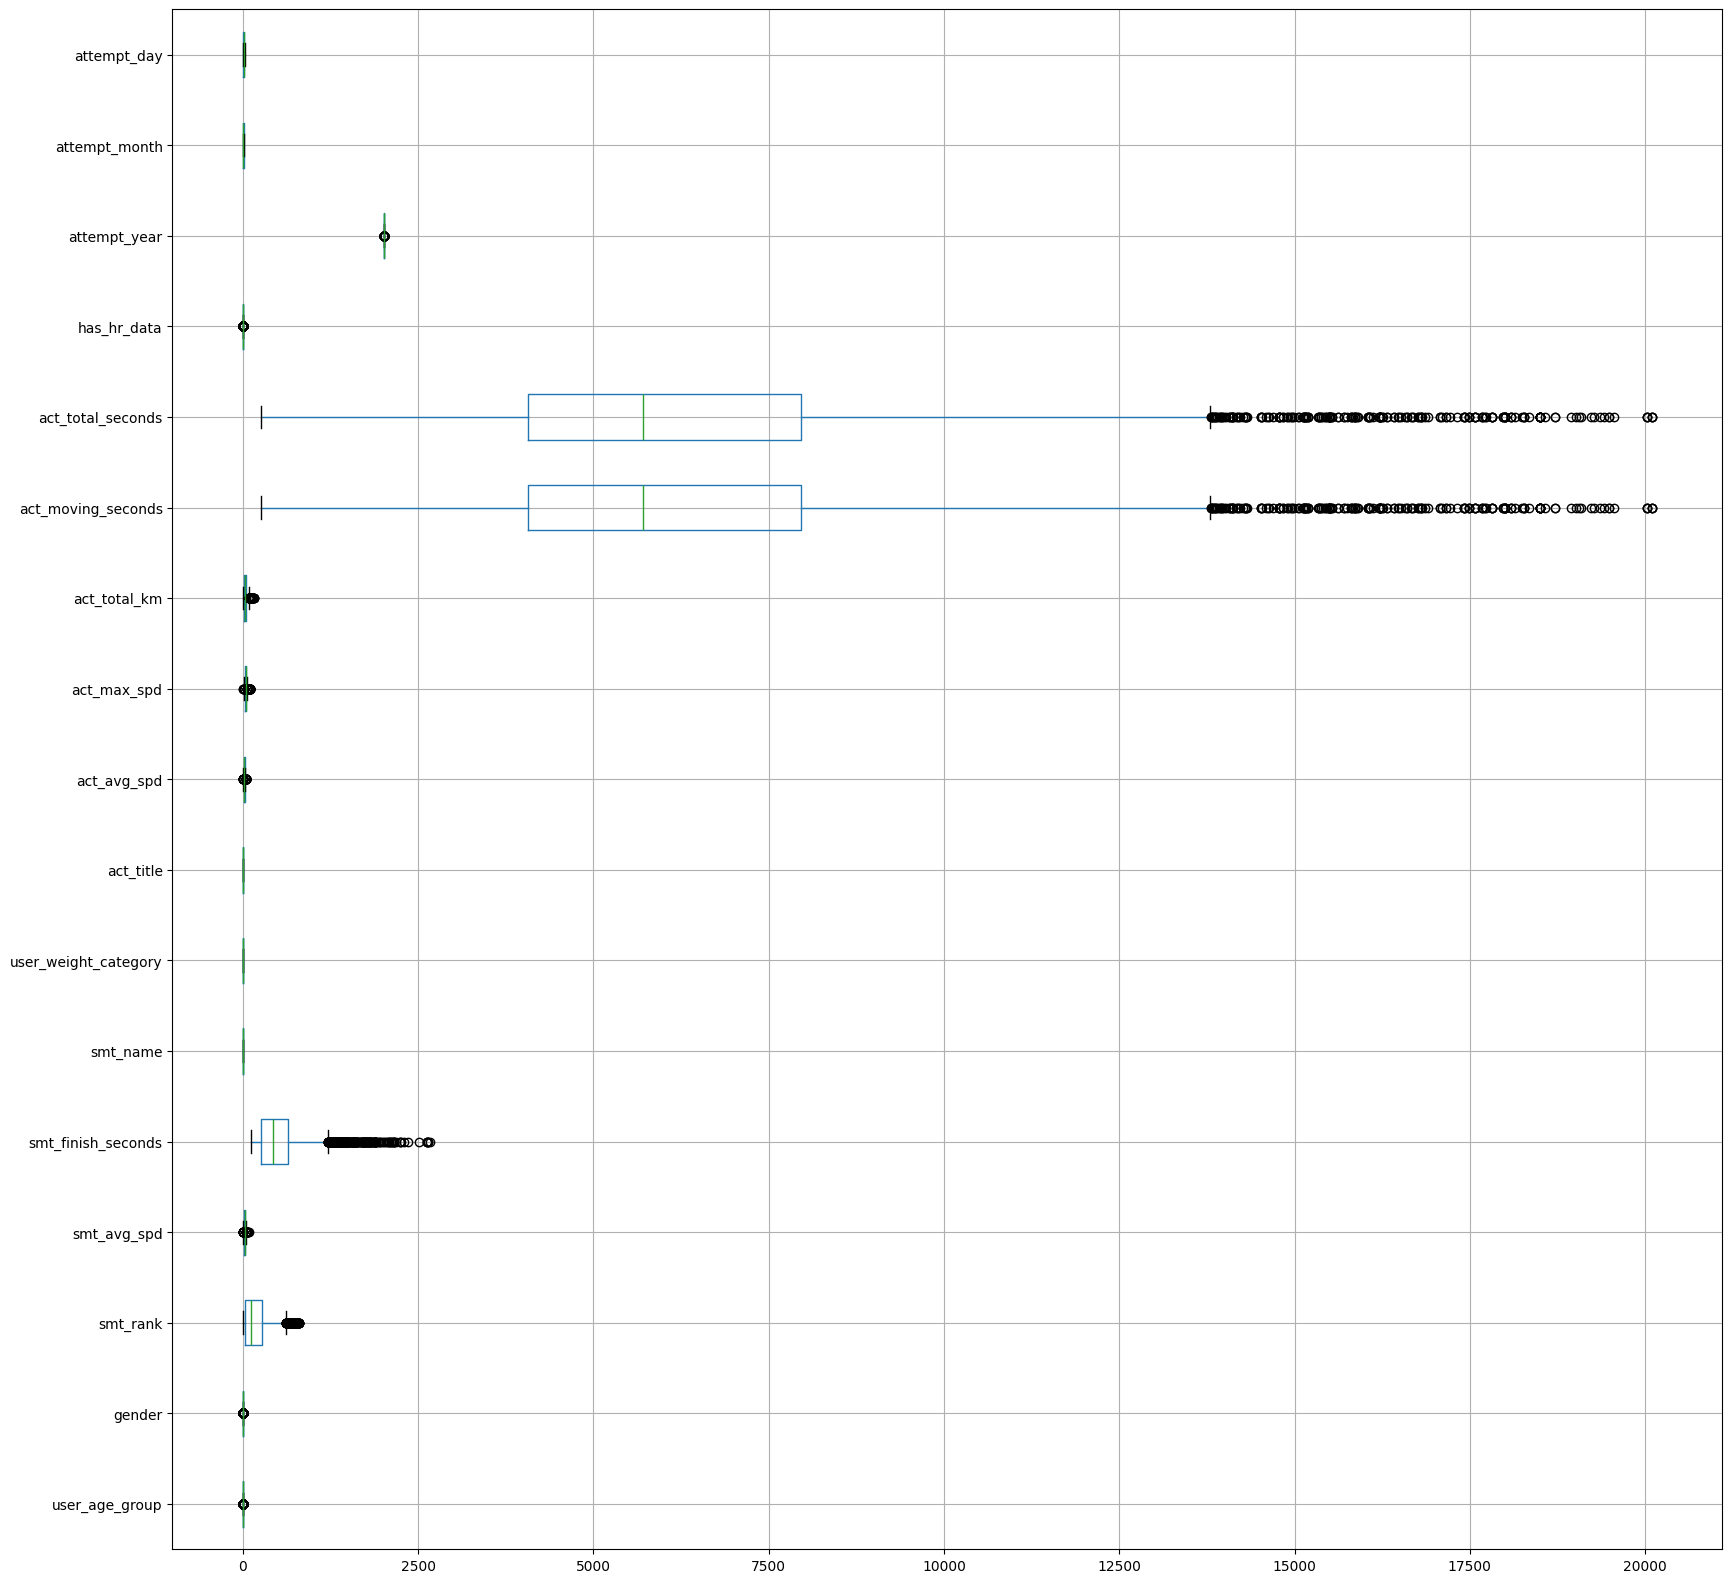

In [95]:
df_knn.boxplot(vert=False, figsize=(20,20))

In [96]:
X_raw = df_knn.drop(["smt_finish_seconds"],axis=1)
y     = df_knn["smt_finish_seconds"]

In [97]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

In [98]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

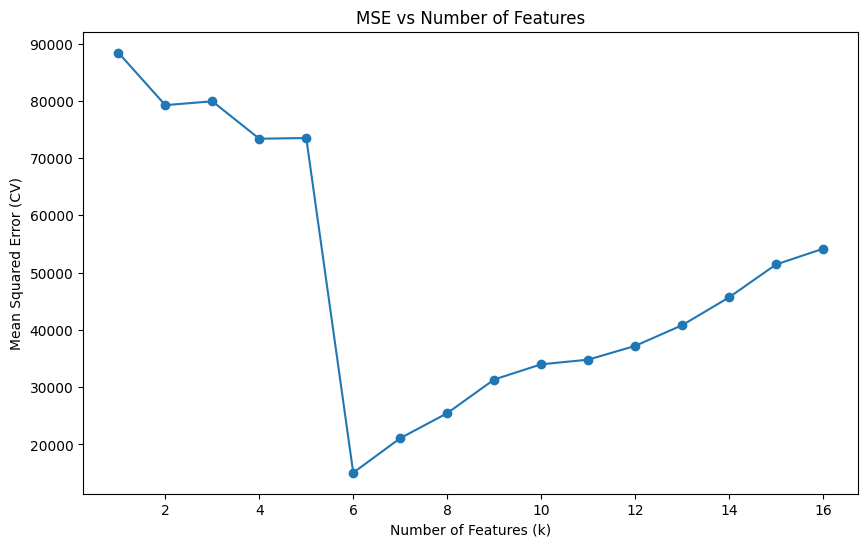

Optimal number of features (k): 6
Minimum MSE: 15058.106


In [99]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# Cari jumlah fitur \(k\) optimal untuk KNN
max_k = X_train_scaled.shape[1]
k_range = range(1, max_k + 1)
cv_scores = []

for k in k_range:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)

    knn = KNeighborsRegressor(n_neighbors=5)
    scores = cross_val_score(knn, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Menentukan \(k\) optimal
k_optimal = k_range[np.argmin(cv_scores)]

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean Squared Error (CV)')
plt.title('MSE vs Number of Features')
plt.show()

print(f"Optimal number of features (k): {k_optimal}")
print(f"Minimum MSE: {min(cv_scores):.3f}")

In [100]:
# Hypertuning KNN
param_grid = {
    'knn__n_neighbors': range(1, 20),  # Tambahkan 'knn__' sebagai prefix
    'knn__weights': ['uniform', 'distance'],  # Tambahkan 'knn__' sebagai prefix
    'knn__metric': ['euclidean', 'manhattan']  # Tambahkan 'knn__' sebagai prefix
}

# Pipeline untuk seleksi fitur dan KNN
pipeline = Pipeline([
    ('select_features', SelectKBest(score_func=f_regression, k=k_optimal)),
    ('knn', KNeighborsRegressor())
])

# Grid Search untuk Hypertuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit model
grid_search.fit(X_train_scaled, y_train)

# Evaluasi Model Terbaik
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
test_score = best_model.score(X_test_scaled, y_test)

print("\nHasil Hypertuning KNN Regression:")
print(f"Parameter Terbaik: {best_params}")
print(f"R^2 Score (CV): {best_score:.3f}")
print(f"R^2 Score (Test): {test_score:.3f}")



Hasil Hypertuning KNN Regression:
Parameter Terbaik: {'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}
R^2 Score (CV): 0.868
R^2 Score (Test): 0.875


In [101]:
# Evaluasi tambahan dengan model spesifik
KNN_euclidean = KNeighborsRegressor(n_neighbors=2, metric='euclidean', weights='distance')
KNN_euclidean.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=2, weights='distance')

In [102]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='r2', cv=5)
print(f'Hasil Evaluasi cross-validation: {scores.mean()}')

Hasil Evaluasi cross-validation: 0.3893668979007492


In [103]:
y_pred = KNN_euclidean.predict(X_test_scaled)
y_pred

array([ 383.26177291,  608.3304535 , 1110.8130454 , ...,  320.8212682 ,
        637.22311468,  416.30020366])

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regressor_performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    print("Evaluasi Regressor:")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R-squared (R^2): {r2:.3f}")
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


In [105]:
y_pred = best_model.predict(X_test_scaled)
evaluate_regressor_performance(y_test, y_pred)

Evaluasi Regressor:
Mean Absolute Error (MAE): 43.043
Mean Squared Error (MSE): 14001.138
Root Mean Squared Error (RMSE): 118.326
R-squared (R^2): 0.875


{'MAE': 43.04256048455463,
 'MSE': 14001.13807782921,
 'RMSE': 118.32640482085648,
 'R2': 0.8750979008044267}

#### Data Tes

In [106]:
test_data_knn = pd.read_csv("https://drive.google.com/uc?id=1aKPCzUk-U1mOvYiMxuUfa_M2TDu_TMXq")

id_test = test_data_knn['id'].copy()
test_data_knn.drop(["id", "user_id"], axis=1, inplace=True)

In [107]:
# Cek missing values awal
print("Missing values before:")
print(test_data_knn.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_name                 0
user_weight_category    39
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
gender                   0
dtype: int64


In [108]:
mode_value = test_data_knn['user_weight_category'].mode()[0]
test_data_knn['user_weight_category'] = test_data_knn['user_weight_category'].fillna(mode_value)

In [109]:
# Label Encoding
gender_mapper = {'female': 1, 'male': 2 }
test_data_knn['gender'] =test_data_knn['gender'].map(gender_mapper)

# Frequency Encoding
frequency_encoding_act = test_data_knn['act_title'].value_counts(normalize=True)
test_data_knn['act_title'] = test_data_knn['act_title'].map(frequency_encoding_act)

# Time-Based Encoding
test_data_knn['attempt_date'] = pd.to_datetime(test_data_knn['attempt_date'])
test_data_knn['attempt_year'] = test_data_knn['attempt_date'].dt.year
test_data_knn['attempt_month'] = test_data_knn['attempt_date'].dt.month
test_data_knn['attempt_day'] = test_data_knn['attempt_date'].dt.day
test_data_knn = test_data_knn.drop('attempt_date', axis=1)

# Ordinal Encoding
weight_mapper = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data_knn['user_weight_category'] = test_data_knn['user_weight_category'].map(weight_mapper)

age_mapper = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data_knn['user_age_group'] = test_data_knn['user_age_group'].map(age_mapper)

mapping = {
    'Starbucks to Majid': 0,
    'King Street side': 1,
    'Al Fardoos to shellfish round about': 2,
    'Headquarters Business Park': 3,
    'PRINCE SULTAN - ASSALAM TO FATIMA': 4,
    'Oghor 2 SailsIsland': 5,
    'Obhur North Short': 6,
    'North Corniche': 7,
    'S.Ubhur Alkurnaysh South Bound with detour': 8
}

test_data_knn['smt_name'] = test_data_knn['smt_name'].map(mapping)

# Menampilan Data
test_data_knn.head()

,user_age_group,smt_rank,smt_avg_spd,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,gender,attempt_year,attempt_month,attempt_day
0,2,33,36.9,4,2,0.149936,34.6,50.8,41.61,4326,4326,0,2,2018,7,15
1,2,181,26.2,0,3,0.002541,25.4,40.3,45.37,6427,6427,0,2,2018,1,3
2,2,3,56.0,5,0,0.094028,22.6,85.3,78.45,12507,12507,0,2,2019,7,19
3,4,142,11.1,7,3,0.213469,12.1,16.9,21.01,6254,6254,0,2,2018,6,22
4,3,216,22.2,0,4,0.001271,21.9,45.7,57.15,9398,9398,0,2,2018,8,29


In [110]:
# Mengatur ulang urutan kolom fitur agar bisa di-predict
columns = list(test_data_knn.columns)

columns.remove('gender')
columns.insert(1, 'gender')

test_data_knn = test_data_knn[columns]

In [111]:
test_data_knn.isnull().sum()

,0
user_age_group,0
gender,0
smt_rank,0
smt_avg_spd,0
smt_name,0
user_weight_category,0
act_title,0
act_avg_spd,0
act_max_spd,0
act_total_km,0


In [112]:
# # Prediksi pada Test Data Baru (Consistent with Pipeline)
# test_data_scaled = scaler.transform(test_data_knn)  # Scaling test data
# knn_predictions = best_model.predict(test_data_scaled)


# # Membuat file untuk submission kaggle
# submission = pd.DataFrame({
# 'id': id_test,  # Gunakan id yang sudah disimpan
# 'smt_finish_seconds': knn_predictions
# })

# submission.to_csv('submisi_knn.csv', index=False)
# submission
